<a href="https://colab.research.google.com/github/chayan141/pytorch_tutorials/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch

In [42]:
import torch.nn as nn
import torch.nn.functional as f

In [43]:
class Model(nn.Module):
  #Input layer (4 features of flower) --> Hidden Layer1 -->H2 --> Output (3 classes of Irish Flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)

    return x


In [44]:
#picking up a manual seed for randomization
torch.manual_seed(41)
model = Model()


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [46]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [47]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [48]:

df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [49]:
X = df.drop('variety',axis=1)
y = df['variety']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [51]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [52]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [54]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [55]:
#train the model
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted data

  #measure loss
  loss = criterion(y_pred,y_train)

  #track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10==0:
    print(f'Epoch: {i} and loss: {loss}')

  #backpropagation:
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

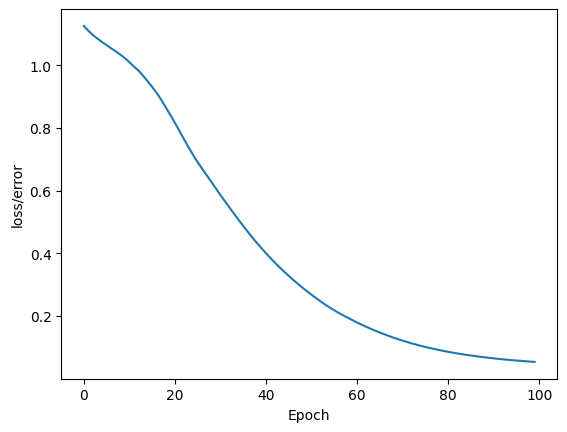

In [56]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [57]:
with torch.no_grad():
  y_eval = model.forward(X_test) #turn off back propagation
  loss = criterion(y_eval,y_test) #finding the loss
print(loss)


tensor(0.1315)


In [58]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i]==0:
      x = 'Setosa'
    elif y_test[i]==1:
      x = 'Versicolor'
    else:
      x='Virginica'

  #will tell us what type of flower class our network thinks it is
    print(f'{i+1} .) {str(y_val)} \t {x} \t {y_val.argmax().item()}')


    #correct or not

    if y_val.argmax().item()==y_test[i]:
      correct+=1

  print(f'we got {correct} correct')

1 .) tensor([-5.8771,  4.4629,  6.5155]) 	 Virginica 	 2
2 .) tensor([-7.5451,  4.1668,  9.7293]) 	 Virginica 	 2
3 .) tensor([-8.4517,  5.1275, 10.2015]) 	 Virginica 	 2
4 .) tensor([-4.3411,  5.6280,  2.5636]) 	 Versicolor 	 1
5 .) tensor([-7.1838,  4.8757,  8.3023]) 	 Virginica 	 2
6 .) tensor([-3.3940,  5.3421,  1.2802]) 	 Versicolor 	 1
7 .) tensor([-5.9240,  4.9826,  6.0025]) 	 Virginica 	 2
8 .) tensor([-4.2895,  5.7016,  2.3920]) 	 Versicolor 	 1
9 .) tensor([-6.5369,  4.9261,  7.1291]) 	 Virginica 	 2
10 .) tensor([-8.0526,  4.4129, 10.3325]) 	 Virginica 	 2
11 .) tensor([-5.6775,  4.9505,  5.6248]) 	 Virginica 	 2
12 .) tensor([ 4.5748, -2.2579, -2.8925]) 	 Setosa 	 0
13 .) tensor([ 4.2646, -2.0055, -2.7342]) 	 Setosa 	 0
14 .) tensor([-2.1081,  4.0482,  0.5803]) 	 Versicolor 	 1
15 .) tensor([ 3.4608, -1.2147, -2.3488]) 	 Setosa 	 0
16 .) tensor([-5.4739,  5.1174,  5.0966]) 	 Virginica 	 1
17 .) tensor([ 4.0637, -1.8045, -2.6504]) 	 Setosa 	 0
18 .) tensor([-5.8090,  4.6057,

# **ANN Using Pytorch (Diabatics Data)**

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Pytorch-Tutorial/master/diabetes.csv')

In [60]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

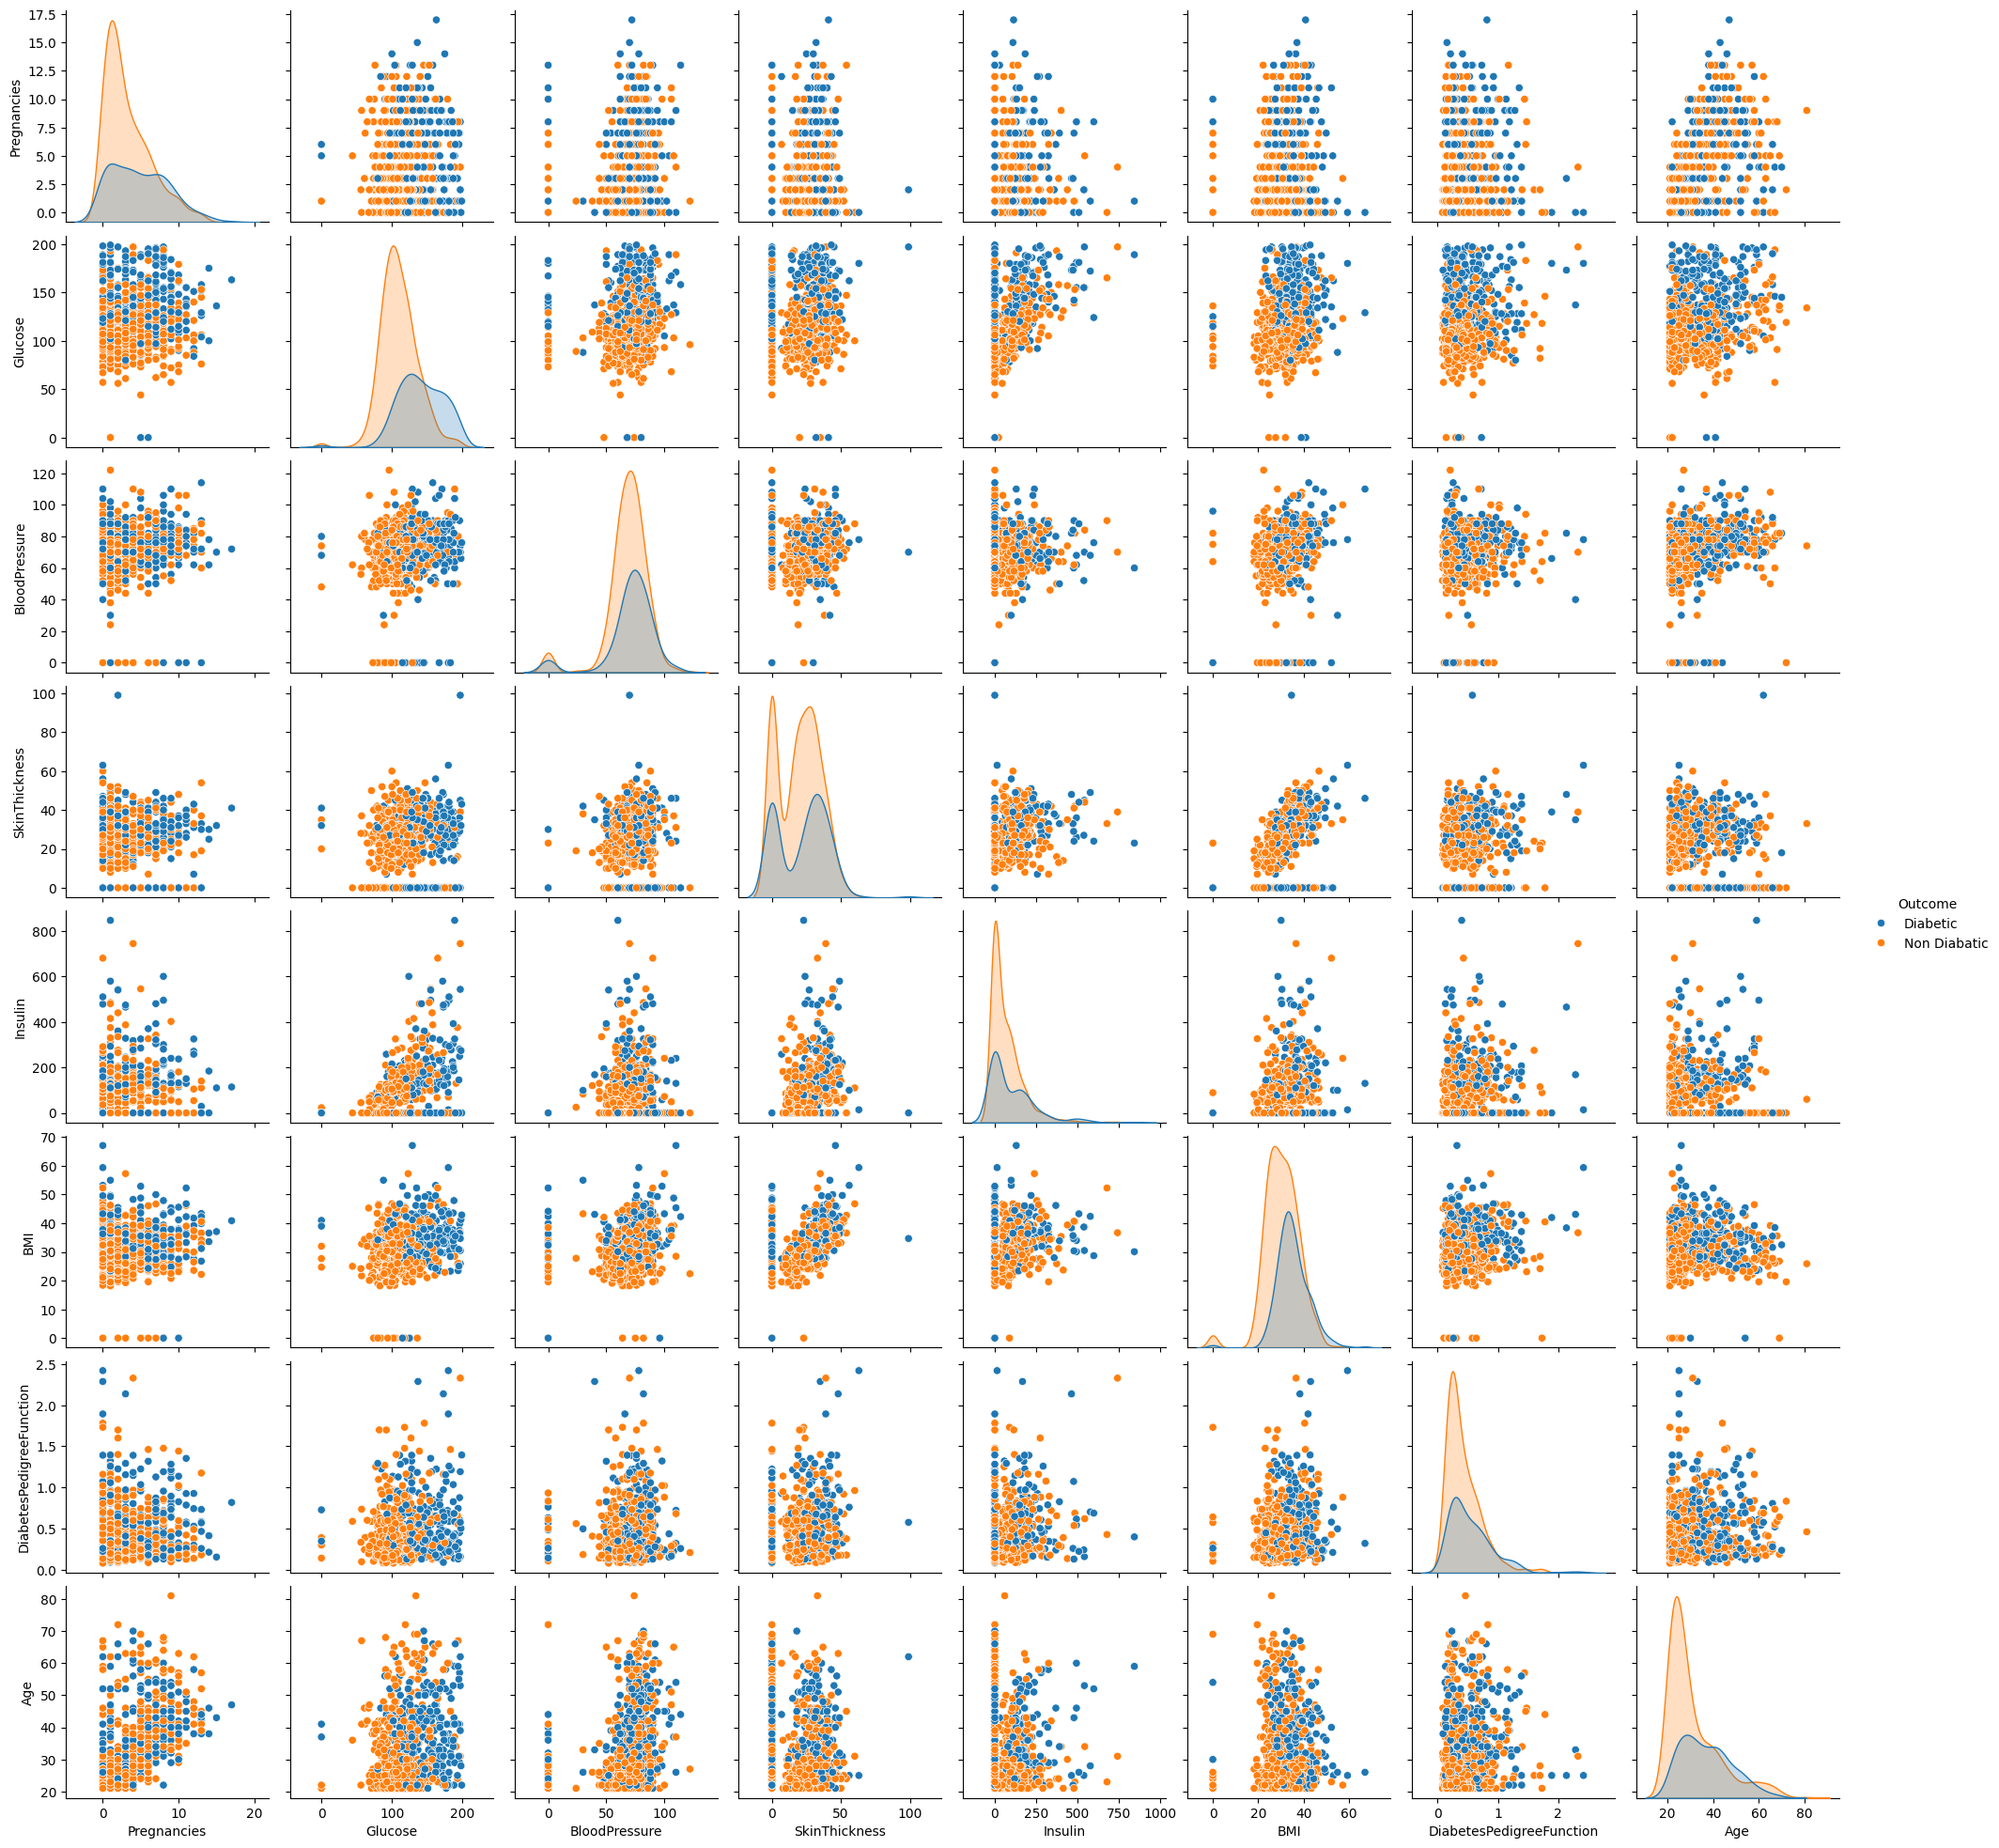

In [62]:
import seaborn as sns
df['Outcome'] = np.where(df['Outcome']==1,"Diabetic",'Non Diabatic')
sns.pairplot(df,hue='Outcome')

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1).values
df['Outcome'] = np.where(df['Outcome']=="Diabetic",1,0)
y = df['Outcome'].values
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [65]:
#Creating Tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [66]:
#Creating the model

class ANN_Model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(input_features,hidden1)
    self.fc2 = nn.Linear(hidden1,hidden2)
    self.out = nn.Linear(hidden2,out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x


In [67]:
#Instantiating the ANN Model
torch.manual_seed(20)
model = ANN_Model()

In [68]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [69]:
##Backpropagation --> Loss Function & Optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [77]:
#training the model
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred,y_train)
  final_losses.append(loss.detach().numpy())
  if i%10==1:
    print(f'Epoch: {i} and loss: {loss}')

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 1 and loss: 0.311301052570343
Epoch: 11 and loss: 0.32063570618629456
Epoch: 21 and loss: 0.26911604404449463
Epoch: 31 and loss: 0.26725637912750244
Epoch: 41 and loss: 0.2621045708656311
Epoch: 51 and loss: 0.2542146146297455
Epoch: 61 and loss: 0.247026726603508
Epoch: 71 and loss: 0.2453298419713974
Epoch: 81 and loss: 0.24225586652755737
Epoch: 91 and loss: 0.2392876148223877
Epoch: 101 and loss: 0.23898787796497345
Epoch: 111 and loss: 0.23695975542068481
Epoch: 121 and loss: 0.23630774021148682
Epoch: 131 and loss: 0.25959739089012146
Epoch: 141 and loss: 0.31246301531791687
Epoch: 151 and loss: 0.25646498799324036
Epoch: 161 and loss: 0.24884994328022003
Epoch: 171 and loss: 0.2388579547405243
Epoch: 181 and loss: 0.23282504081726074
Epoch: 191 and loss: 0.23082681000232697
Epoch: 201 and loss: 0.22858774662017822
Epoch: 211 and loss: 0.23845848441123962
Epoch: 221 and loss: 0.29316264390945435
Epoch: 231 and loss: 0.24851006269454956
Epoch: 241 and loss: 0.2434266656637

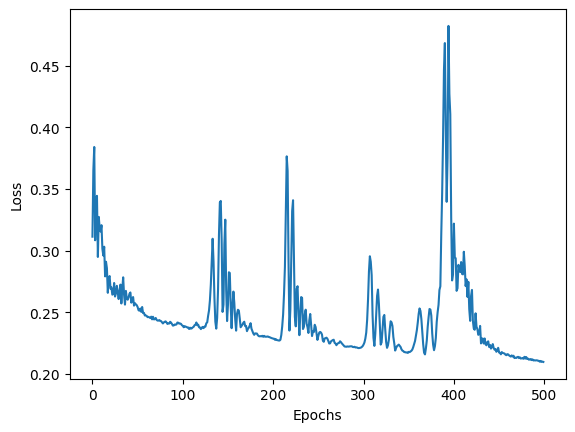

In [80]:
#Plotting the loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [81]:
#prediction on X_test

predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
0
0
0
1
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[82, 25],
       [17, 30]])

Text(95.72222222222221, 0.5, 'Predicted Values')

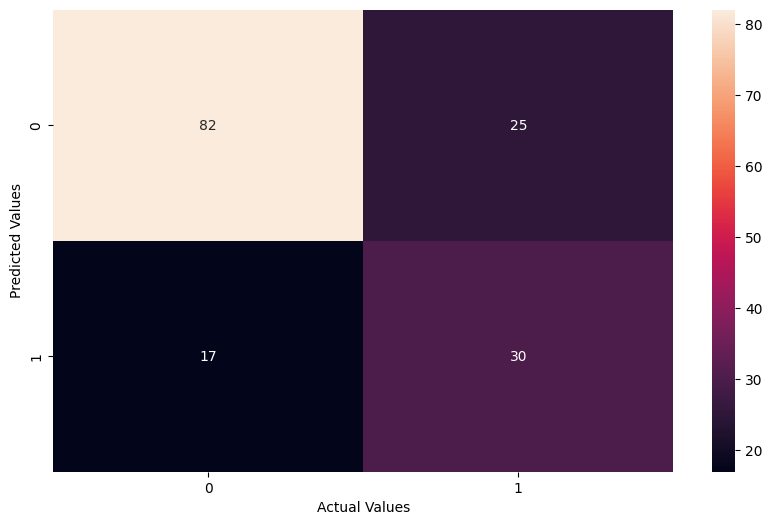

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [84]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

0.7272727272727273

In [85]:
##Save the model

torch.save(model,'diabatics.pt')

In [86]:
model1 = torch.load('diabatics.pt')

In [87]:
model1.eval()

ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)